In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [293]:
def regression(x, y, y_true, sigma):
    n = 0
    V = 0
    v = np.zeros((4,1))
    T = np.zeros((4,4))
    for i in range(len(x)):
        F_x = np.array([[1, x[i], x[i] ** 2, x[i] ** 3]])
        n += 1
        V += y[i] ** 2
        reverse = F_x.reshape(-1, 1)
        v +=  y[i] * reverse
        T += (F_x.T @ F_x)
    new_f = np.array([])
    new_var = np.array([])
    new_var_hat = np.array([])
    for j in range(len(x)):
        F_x = np.array([[1, x[j], x[j] ** 2, x[j] ** 3]])
        f_hat = F_x @ np.linalg.inv(T) @ v
        new_f = np.append(new_f, f_hat)
        var_f_hat = (sigma ** 2) * (F_x @ np.linalg.inv(T) @ F_x.T)
        new_var = np.append(new_var, var_f_hat)
        var_hat = (((V - v.T @ np.linalg.inv(T) @ v)/(n - 4)) * (F_x @ np.linalg.inv(T) @ F_x.T))
        new_var_hat = np.append(new_var_hat, var_hat)
    plt.plot(x, new_f, 'b')
    plt.plot(x, new_f + new_var, 'b--')
    plt.plot(x, new_f - new_var, 'b--')
    plt.plot(x, y_true + new_var_hat, 'g--')
    plt.plot(x, y_true - new_var_hat, 'g--')
    plt.legend(['real','learned','learned_error +','learned_error -','real_error +','real_error -'])
    plt.show()

In [294]:
def model(i):
    sigma = 50
    x = np.sort(np.random.randn(i)) * 5
    y_true = 1 + 0.5 * x -1.5 * (x ** 2) + 1 * (x ** 3)
    f_x = 1 + 0.5 * x -1.5 * (x ** 2) + 1 * (x ** 3) + np.random.randn(i) * sigma
    m = 4
    plt.figure(figsize=(15, 10))
    plt.scatter(x, f_x)
    plt.plot(x, y_true, 'r')
    regression(x, f_x, y_true, sigma)

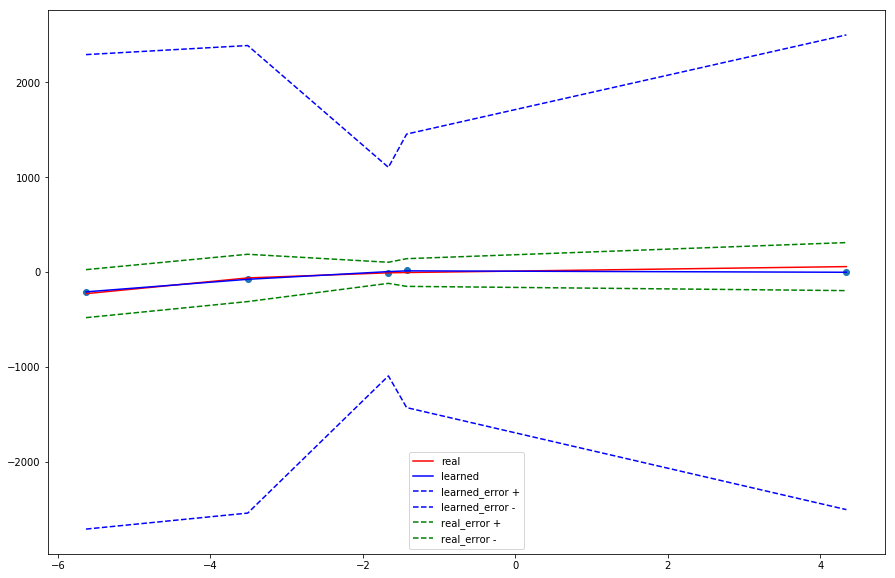

In [300]:
model(5)

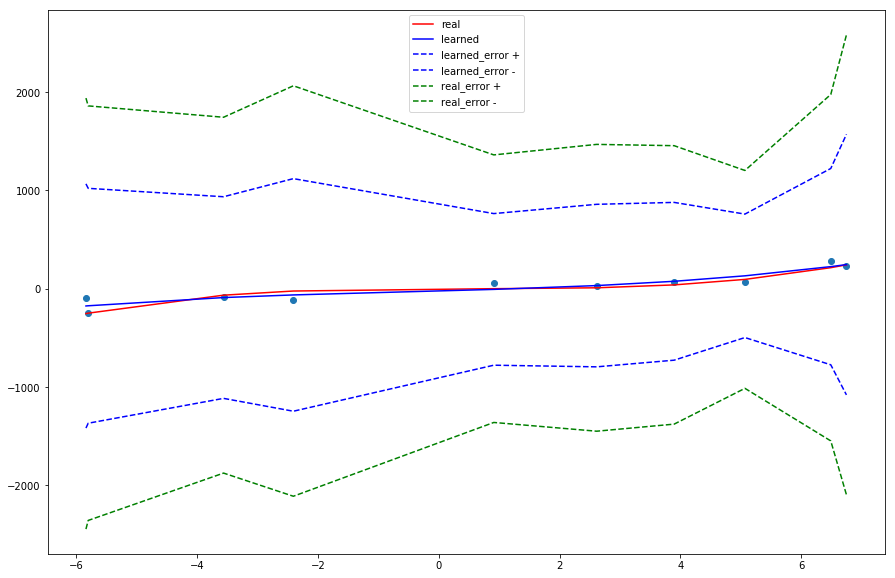

In [301]:
model(10)

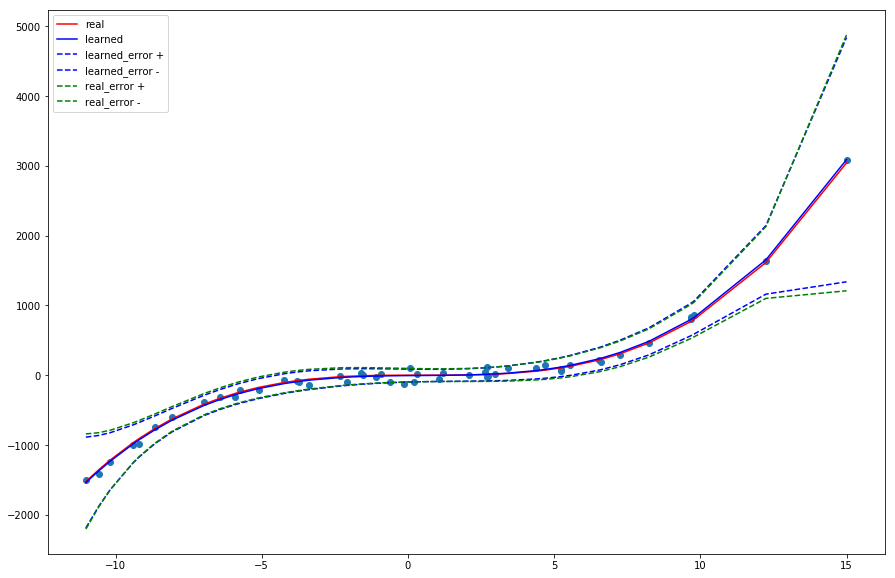

In [297]:
model(50)

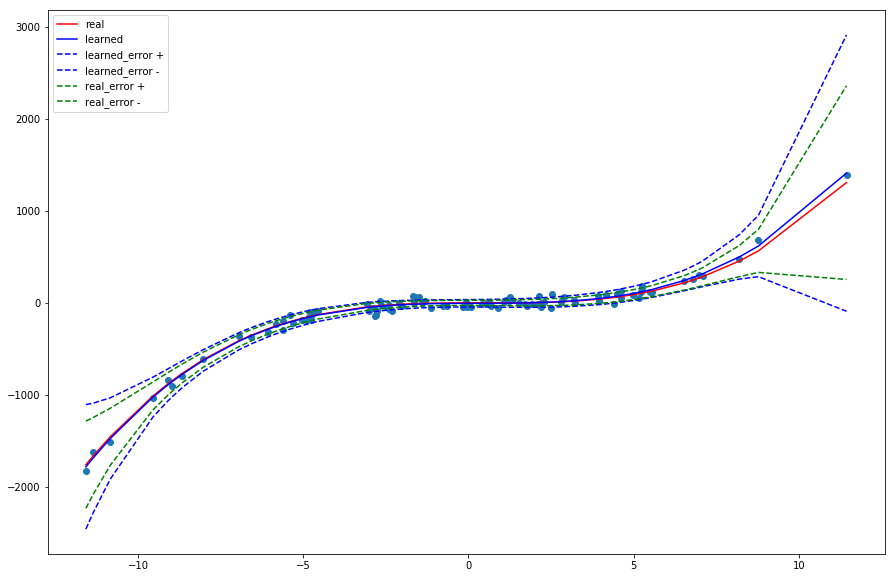

In [298]:
model(100)

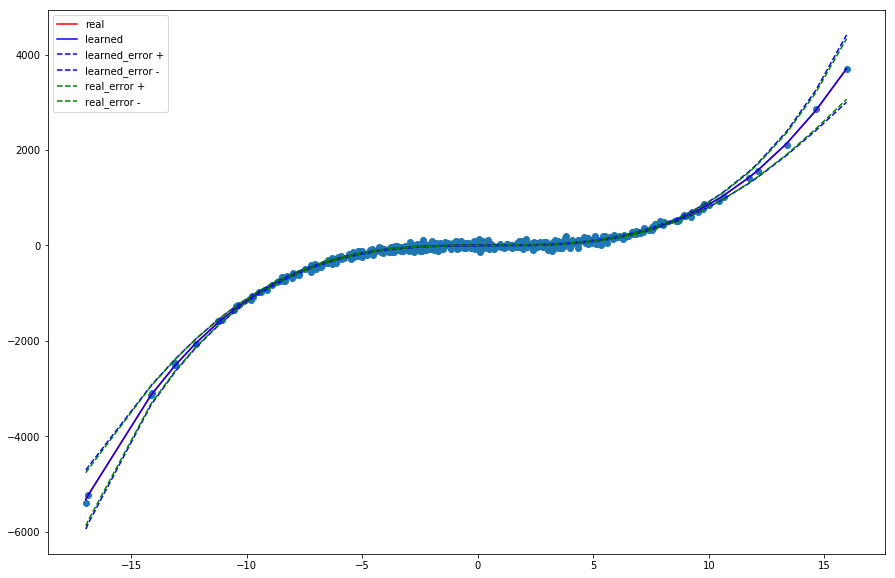

In [299]:
model(500)